In [108]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjobs as mr


ImportError: No module named mrjobs

### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"

STEPS:

1) write a mapper method which gives the putput as 2 words and  a 1 as its value.

2) Write a combiner which combines the keys and gives a arrray of its values.

3) Now the reducer will do the job, our job is to sum all these values. It is done by reducer.

4) We only need top ten, so Get_Only_ten is a reducer which sorts based on values and gets the top 10.

5) Steps method tells the mrjobs the order to execute.

In [222]:
%%writefile code\MRBigram.py

#saving the code to a file

from mrjob.job import MRJob
from mrjob.step import MRStep
import re

class MRBigram(MRJob):

    #mapper method
    def mapper(self, _, line):
        line = line.lower().split()
        for words in zip(line, line[1:]):
            yield list((words[0], words[1])), 1

    #combiner method
    def combiner(self, word, counts):
        yield word, sum(counts)
        
    #reducer method
    def reducer(self, key, values):
        yield None, (key, sum(values))
        
    #reducer2 method which only gets sorted top 10
    def Get_only_ten(self, _, wordpairs):
        for result in sorted(wordpairs, key=lambda x:x[1], reverse=True)[:10]:
            yield result
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.Get_only_ten)
        ]
if __name__ == '__main__':
    MRBigram.run()

Overwriting code\MRBigram.py


In [110]:
%run -i code\MRBigram.py -o output1 data\bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configu

Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000
Creating temp directory c:\users\shiva\a

INFO:mrjob.runner:Removing temp directory c:\users\shiva\appdata\local\temp\MRBigram.shiva.20181010.184332.019000...
[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000\\cache\\MRBigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRBigram.shiva.20181010.184332.019000\\step\\000

## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 
STEPS:

1) write a mapper method which gives the output as 2 SORTED words and  a 1 as its value.

2) Write a combiner which combines the keys and gives a arrray of its values.

3) Now the reducer will do the job, our job is to sum all these values. It is done by reducer.

4) We only need top ten, so Get_Only_ten is a reducer which sorts based on values and gets the top 10.

5) Steps method tells the mrjobs the order to execute.

In [223]:
%%writefile code\MR2Equal.py

 #saving the code to a file

from mrjob.job import MRJob
from mrjob.step import MRStep
import re

class MR2Equal(MRJob):

    #mapper method mpa as per the requirements
    def mapper(self, _, line):
        line = line.lower().split()
        for words in zip(line, line[1:]):
            yield list(sorted((words[0], words[1]))), 1

    #combiner which is the next step after mapper
    def combiner(self, word, counts):
        yield word, sum(counts)
    #reducer is to combine all teh values in each keys
    def reducer(self, key, values):
        yield None, (key, sum(values))
    #this is also a reducer which sorts out and gets the top ten
    def Get_only_ten(self, _, wordpairs):
        for result in sorted(wordpairs, key=lambda x:x[1], reverse=True)[:10]:
            yield result
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.Get_only_ten)
        ]
if __name__ == '__main__':
    MR2Equal.run()

Overwriting code\MR2Equal.py


In [112]:
%run code\MR2Equal.py -o output2 data\bible+shakes.nopunc.txt 

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configu

Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000
Creating temp directory c:\users\shiva\a

Removing temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000...
Removing temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000...
Removing temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000...
Removing temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000...
INFO:mrjob.runner:Removing temp directory c:\users\shiva\appdata\local\temp\MR2Equal.shiva.20181010.184420.270000...
[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261,

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000\\cache\\MR2Equal.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MR2Equal.shiva.20181010.184420.270000\\step\\000

## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...

STEPS:

1) write a mapper method which gives the putput as 3 words and  a 1 as its value.

2) Write a combiner which combines the keys and gives a arrray of its values.

3) Now the reducer will do the job, our job is to sum all these values. It is done by reducer.

4) We only need top ten, so Get_Only_ten is a reducer which sorts based on values and gets the top 10.

5) Steps method tells the mrjobs the order to execute.

In [113]:
%%writefile code\MRTrigram.py

#writing locally

from mrjob.job import MRJob
from mrjob.step import MRStep
import re


class MRTrigram(MRJob):

    def mapper(self, _, line):
        line = line.lower().split()
        for words in zip(line, line[1:], line[2:]):
            yield list(sorted((words[0], words[1], words[2]))), 1

    def combiner(self, word, counts):
        yield word, sum(counts)
    def reducer(self, key, values):
        yield None, (key, sum(values))
    def Get_only_ten(self, _, wordpairs):
        for result in sorted(wordpairs, key=lambda x:x[1], reverse=True)[:10]:
            fp.write(str(result))
            yield result
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.Get_only_ten)
        ]
if __name__ == '__main__':
    MRTrigram.run()

Overwriting code\MRTrigram.py


In [114]:
%run   code/MRTrigram.py -o output3  data/bible+shakes.nopunc.txt 

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configu

Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000
Creating temp directory c:\use

Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
INFO:mrjob.runner:Removing temp directory c:\users\shiva\appdata\local\temp\MRTrigram.shiva.20181010.184506.762000...
[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.sh

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\000\\cache\\MRTrigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\000\\cache\\MRTrigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\000\\cache\\MRTrigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\000\\cache\\MRTrigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\

[Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\000\\cache\\MRTrigram.py'
Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda2\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 266, in rmtree
    onerror(os.remove, fullname, sys.exc_info())
  File "C:\Users\shiva\Anaconda2\lib\shutil.py", line 264, in rmtree
    os.remove(fullname)
WindowsError: [Error 5] Access is denied: u'c:\\users\\shiva\\appdata\\local\\temp\\MRTrigram.shiva.20181010.184506.762000\\step\\

## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

Steps:

1) instantiate the size of the figure.

2) Adding column names and arranging in the numpy array for wide spread in equal intervals

3)Reading the table and ploting the BAR

If we observer the bars for bigrams and trigrams, the top set of words are almost similar because Bigrams is the subset of Trigrams. If the set of Trigrams is "of the lord" then "of the" will be also highest frequency in Bigram. This might not be always the case but in this example, it is.

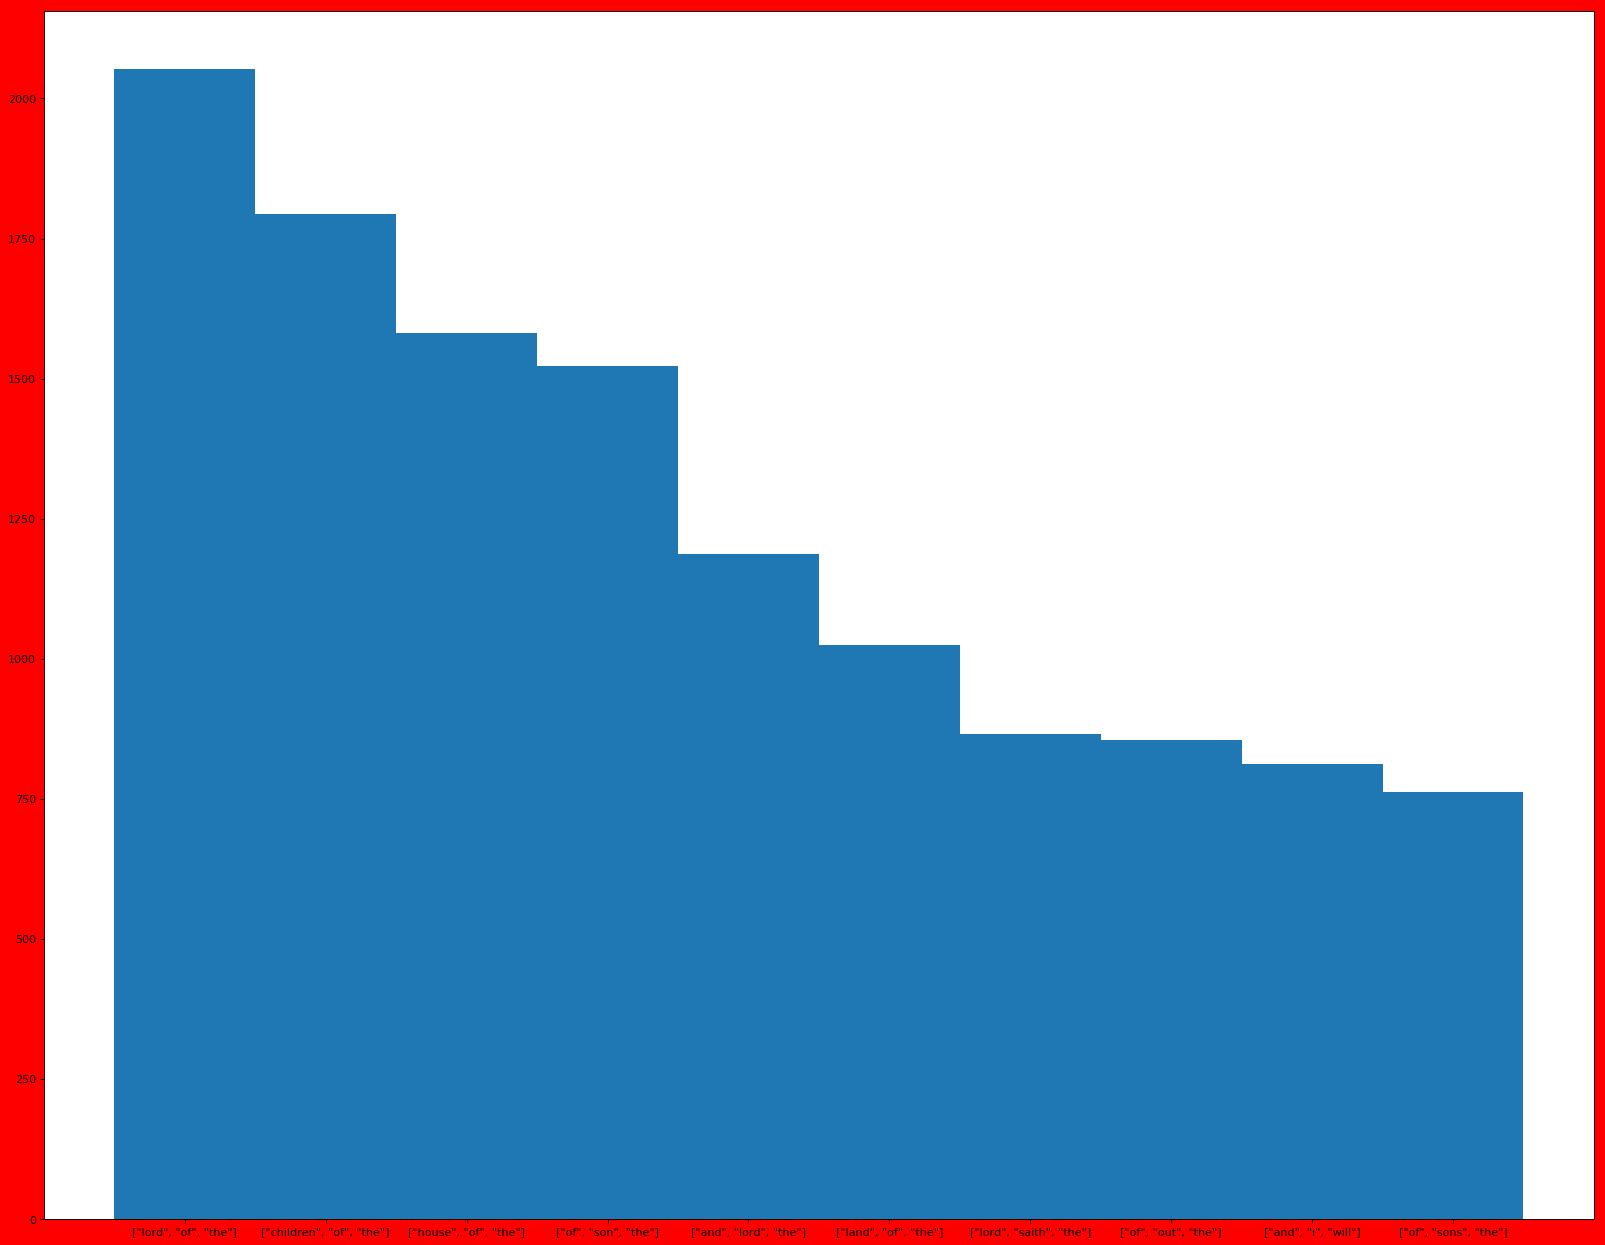

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(25, 20), dpi=80, facecolor='r', edgecolor='k')

colNames = ['Trigram']
colNames.append('frequency')

xy = np.arange(10)    

# actually read the data, then take a look at it
Tri = pd.read_table("output3\part-00000", header=None, names=colNames)

x = Tri['frequency'].values
plt.bar(xy, x, width = 1)

plt.xticks(xy, Tri['Trigram'].values)
plt.show()

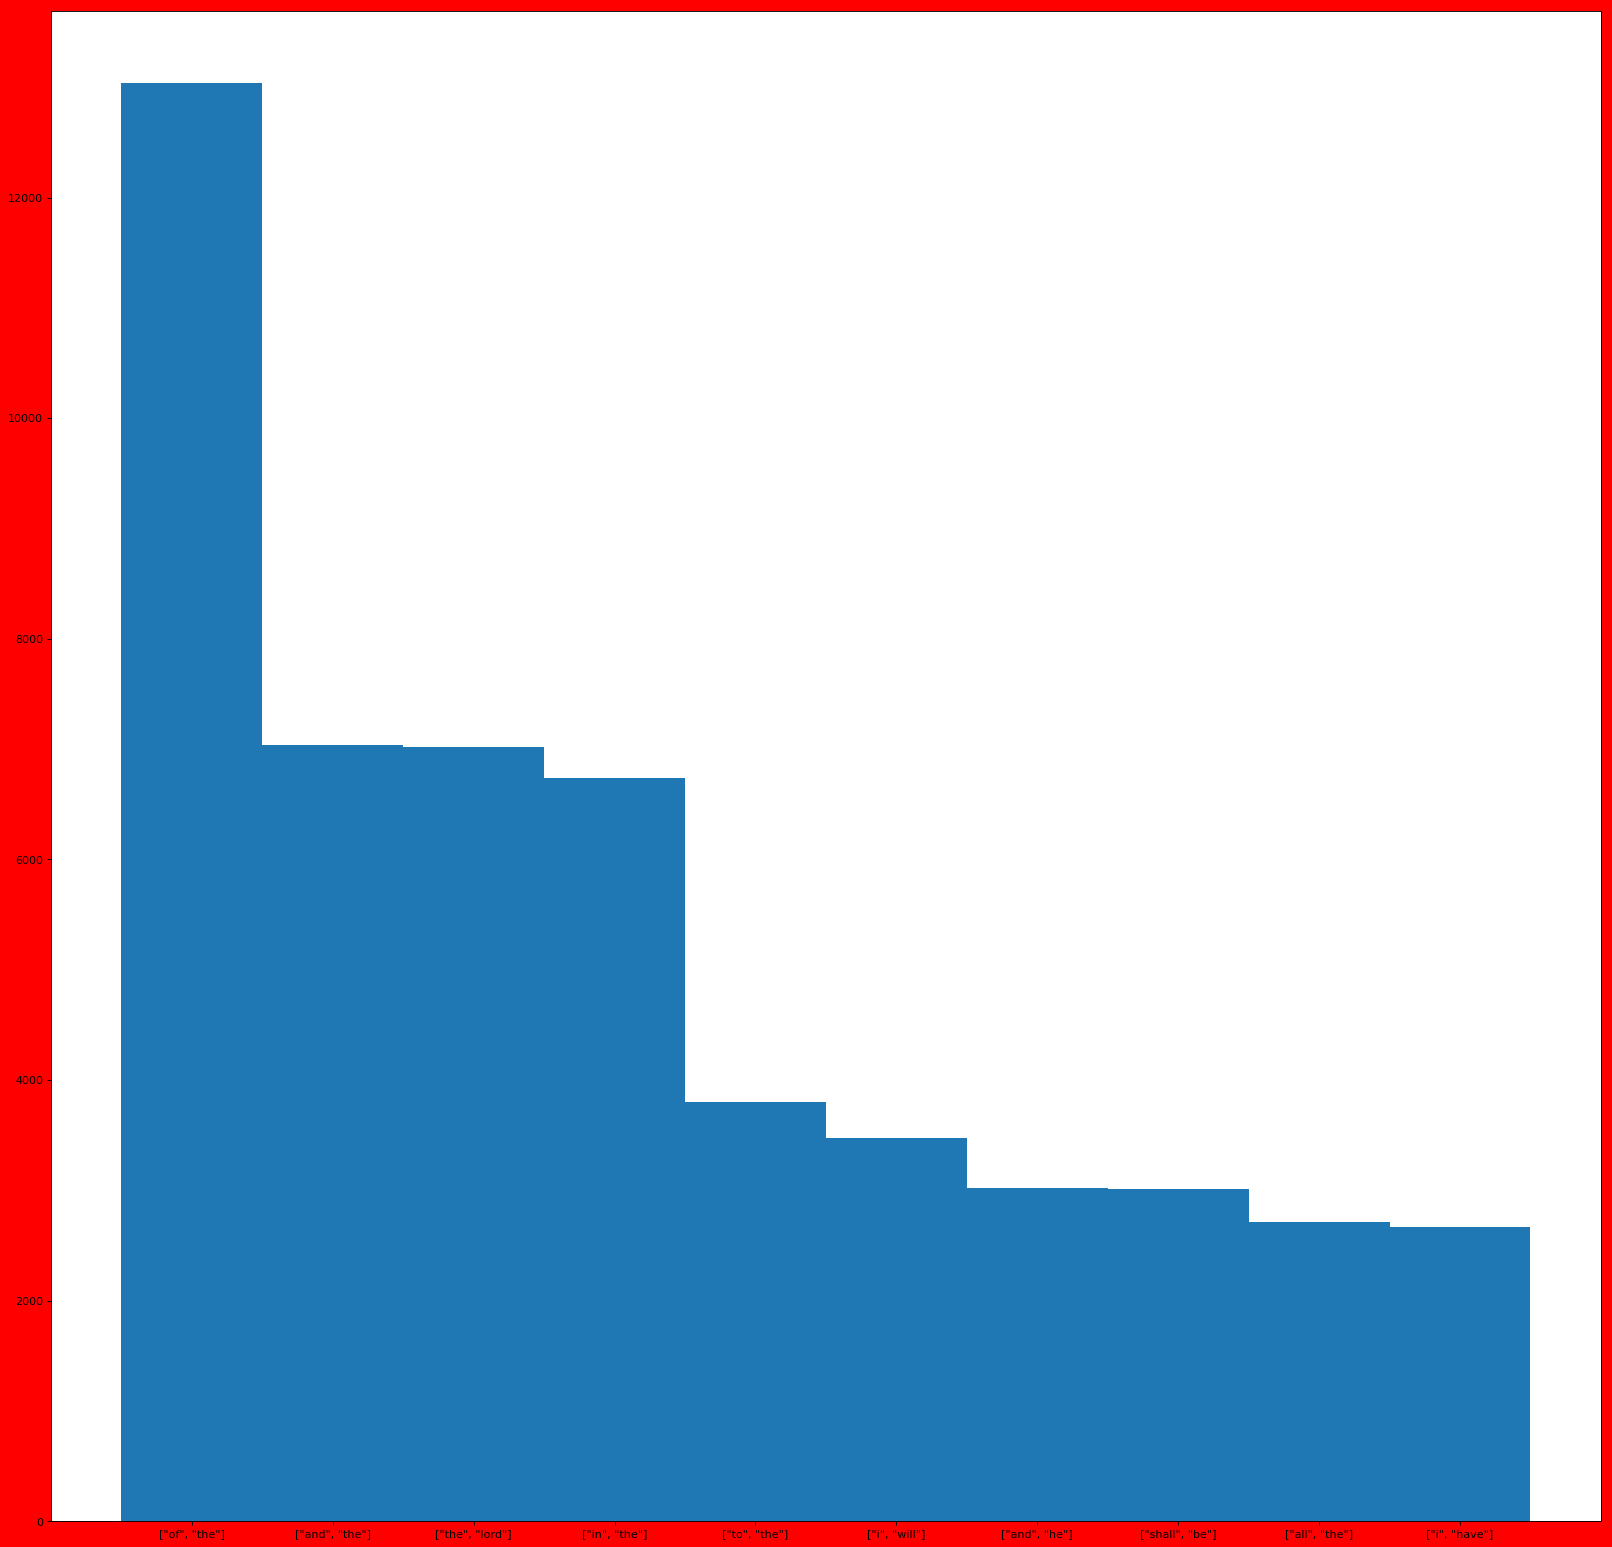

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(25,25), dpi=80, facecolor='r', edgecolor='k')

colNames = ['Bigram']
colNames.append('frequency')

xy = np.arange(10)    

# actually read the data, then take a look at it
Tri = pd.read_table("output1\part-00000", header=None, names=colNames)

x = Tri['frequency'].values
plt.bar(xy, x, width = 1)

plt.xticks(xy, Tri['Bigram'].values)
plt.show()

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [225]:
%%writefile code\MRExtra.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re


class MRExtra(MRJob):

    global fp

    def mapper(self, _, line):
        line = line.lower().split()
        for words in zip(line, line[1:], line[2:]):
            yield list(sorted((words[0], words[1], words[2]))), 1

    def combiner(self, word, counts):
        yield word, sum(counts)
    def reducer(self, key, values):
        yield None, (key, sum(values))
    def Get_only_ten(self, _, wordpairs):
        fp = open('output.txt','w')
        for result in sorted(wordpairs, key=lambda x:x[1], reverse=True)[:10]:
            fp.write(str(result))
            yield result
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.Get_only_ten)
        ]
if __name__ == '__main__':
    MRExtra.run()


Overwriting code\MRExtra.py


In [226]:
import requests
response = requests.get('http://www.gutenberg.org/files/108/108-0.txt')


In [227]:
%run   code/MRExtra.py < response.text

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configu

IOError: Input path < does not exist!